# **UFO Location Analysis**
#### **Team:**
#### **1)Cody Boleyn**
#### **2)Bhavin Bhatt**
#### **3)Mubtasim Haque Talha**

###**Objective**
Setting out on this final project, we wanted to take a look at something outside of the normal realm of data analysis. We chose our dataset with the intent of having a bit of fun, an ultimately see how we could leverage what we've learned in an abstract way. Our goal in the project was to accomplish something that people have been facinated with for centuries, which is locating UFOs. Below we have used a very large dataset that documents the various sighting over the last century. Our objective is to somehow use the data to not only visualize these rare occurances, but to also hopefully identify locations where these sightings happen more frequently. Belows are the steps we took, and the final results.

### **Data Preparation and Cleaning:**

1.   The first step in analyzing the UFO sighting data is to import the dataset. We also imported the various libraries needed to enable us to use a variety of functions throughout the report. It was cleaner for visualization to add them all to the begining of the report during the final edit.

2.   For this portion of the report, we also took a look at the basic struction of the data, data types, feature names, and the data that was contained within each feature.

3.   At this point, we did not remove any of the rows with missing values as they may still have valuable information for our analysis. We will handle missing values differently for each step of our analysis.








In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Load the data
ufo_data = pd.read_csv("scrubbed(reformat) (1).csv")

<ipython-input-2-d17f4c63aaf6>:17: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv("scrubbed(reformat) (1).csv")


In [3]:
ufo_data.describe()

latitude    longitude 
count  80332.000000  80332.000000
mean      38.124416    -86.772885
std       10.469586     39.697205
min      -82.862750   -176.658060
25%       34.134720   -112.073330
50%       39.411110    -87.903610
75%       42.788330    -78.755000
max       72.700000    178.441900

In [4]:
# Display the first few rows of the modified DataFrame
ufo_data.head()

datetime                  city state country     shape  \
0  10/10/49 20:30            san marcos    tx      us  cylinder   
1  10/10/49 21:00          lackland afb    tx     NaN     light   
2  10/10/55 17:00  chester (uk/england)   NaN      gb    circle   
3  10/10/56 21:00                  edna    tx      us    circle   
4  10/10/60 20:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted  latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.88306   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005  29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21/2008  53.20000   
3  My older brother and twin sister were leaving ...   1/17/2004  28.97833   
4  AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004  21.41806   

   longitude   
0   -97.94111  
1   -98.58108  
2    -2.91667  
3   -96.64583  
4  -157.80361

In [5]:
ufo_data.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                float64
longitude               float64
dtype: object

In [6]:
ufo_data.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [7]:
#Stripping feature names of hidden spaces
ufo_data.columns = ufo_data.columns.str.strip()

### **Exploratory Analysis and Visualization:**

#### **Sightings by Country**
1.   Since our primary objective is to try an understand where sighting happen more frequent, it would be good to visualize what country have the most reported sighting in the dataset.

2.   Before we created out chart, we needed to replace the null values for country with a more descriptive value, "unknown".

3.   Below you can see that the US had the highest number of UFO sightings, followed by Canada(ca), Great Britain(gb), Australia(au) and Germany(de). Many of the instances had missing values for the country column, so we can see the height of the bar "unknown" is the second highest in this barplot.





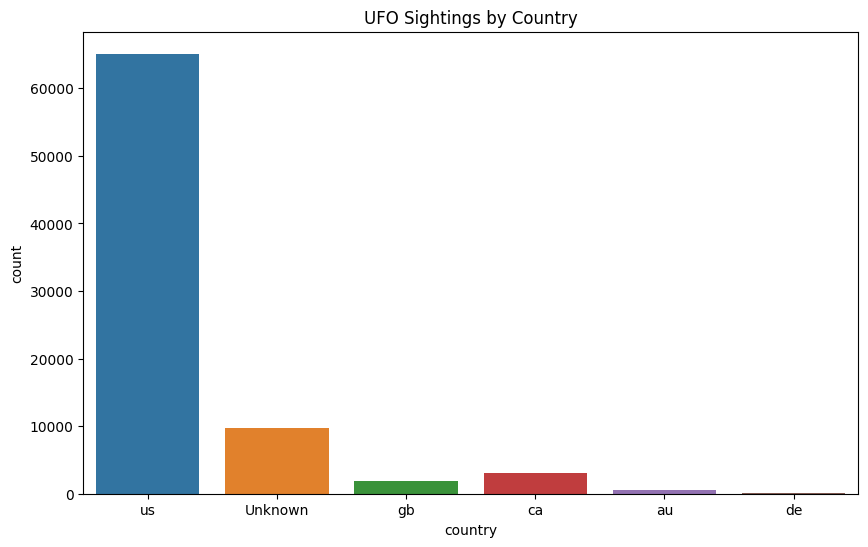

In [8]:
# Filling missing 'state' and 'country' values with 'Unknown'
ufo_data['state'].fillna('Unknown', inplace=True)
ufo_data['country'].fillna('Unknown', inplace=True)

# Plotting sightings by country
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=ufo_data)
plt.title('UFO Sightings by Country')
plt.show()



#### **UFO Sightings by Year**
1.   Due to the date above being spread over and erronious span of time, we need to filter those dates so that we only see date from the current date and into the past. This is something that became apparent during out initial analysis, but we excluded the erronious data visualizations in order to maintain a clean and uncluttered report.
2.   Below we can see that see that the amount of sighting reported started to ramp up around 1995, and then took a sharp decline in 2014. Beyond that, the data does not show any other sigthing up until the current date of this report.



In [9]:
from datetime import datetime

# Handling date parsing errors
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

# Extract year, month, and day from the datetime
ufo_data['year'] = ufo_data['datetime'].dt.year
ufo_data['month'] = ufo_data['datetime'].dt.month
ufo_data['day'] = ufo_data['datetime'].dt.day

# Current date for reference
current_date = datetime.now()

# Filter out the rows where the 'datetime' value is greater than the current date
ufo_data = ufo_data[ufo_data['datetime'] <= current_date]

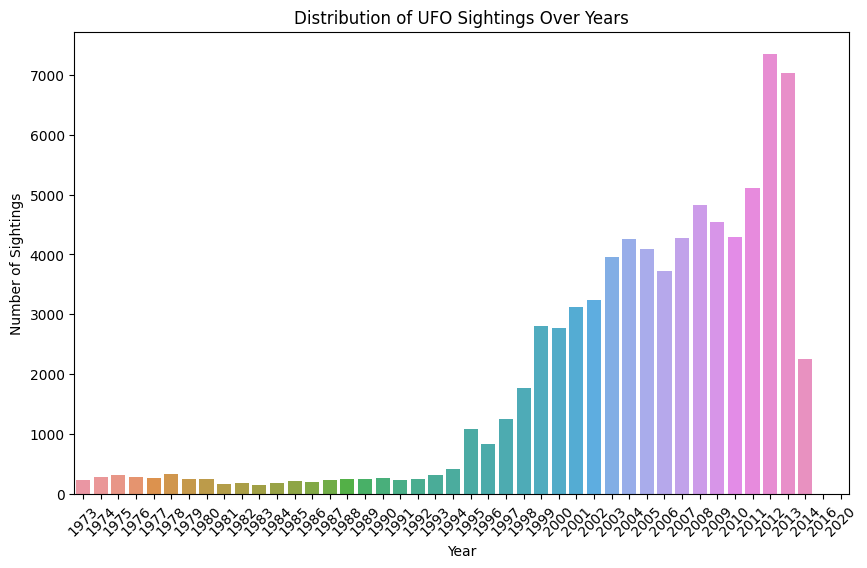

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=ufo_data)
plt.xticks(rotation=45)
plt.title('Distribution of UFO Sightings Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


#### **UFO Sighting by Shape**
1.   From the horizontal bar plot below, it is clear that the shape 'light' is very commonly reported for UFO sightings, it is present in almost 2x more instances than the 2nd most popular shape, triangle.

2.   Perhaps this is an error in the dataset, but we also don't want to rule it out as being useful for later explorations. Perhaps "light" was the only way the sighting shape could be described.



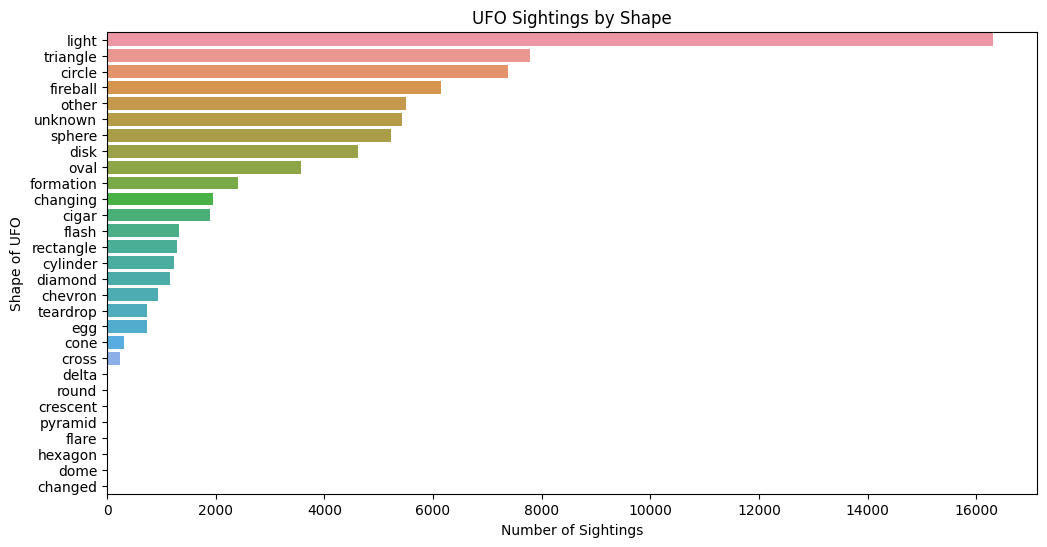

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='shape', data=ufo_data, order = ufo_data['shape'].value_counts().index)
plt.title('UFO Sightings by Shape')
plt.xlabel('Number of Sightings')
plt.ylabel('Shape of UFO')
plt.show()

### **Machine Learning Model:**


1.   As a continued evaluation of what we visualized ealier regarding shapes, we wanted to see if there was any other way we could understand what the report shape of "light" may be correlated with.

2.   Our approach was to use Machine Learning techniques to compare what was reported in the comments portion of the dataset, and the eventual shape that was records. This was an approach that we didn't know how to accomplish for our lessons in class, but we knew that it was possible. This being the case, we used ChatGPT to help us with the code necessary to parse the data. We then tuned and manipulated the code for our purposes.

**Description of function:** The TfidfVectorizer is used to convert the text data in the 'comments' column into a matrix of TF-IDF features. The stop_words='english' parameter tells the vectorizer to ignore common English stop words.Here, min_df and max_df are set as parameters for the TfidfVectorizer. min_df is the minimum frequency a word must have to be included in the feature set. The words that appear in more than 75% of the documents are ignored.





In [12]:
ufo_data['shape'].fillna('unspecified', inplace=True)

# Define the min_df and max_df parameters for TfidfVectorizer
min_df = 0.001
max_df = 0.75

tfidf = TfidfVectorizer(stop_words='english', min_df=min_df, max_df=max_df)
X = tfidf.fit_transform(ufo_data['comments'].fillna(''))

# Naive Bayes classification for UFO shapes from comments
y = ufo_data['shape']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    changing       0.72      0.07      0.13       374
     chevron       0.89      0.18      0.30       177
       cigar       0.88      0.37      0.52       369
      circle       0.44      0.19      0.27      1477
        cone       1.00      0.03      0.06        67
    crescent       0.00      0.00      0.00         1
       cross       0.00      0.00      0.00        37
    cylinder       0.80      0.23      0.36       246
       delta       0.00      0.00      0.00         2
     diamond       0.87      0.14      0.24       235
        disk       0.50      0.42      0.45       940
         egg       0.94      0.12      0.22       140
    fireball       0.72      0.51      0.60      1244
       flare       0.00      0.00      0.00         1
       flash       0.62      0.04      0.07       257
   formation       0.40      0.03      0.05       469
       light       0.32      0.90      0.47      3300
       other       0.26    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Hyperparameter Tuning of Model**

1.    As per above observations when calculating these probabilities, if a given feature (word) has not been observed with a particular class in the training data, the probability estimate for that class would be zero which would zero out the entire probability for the class, regardless of what other features are present. Thus we will use smoothing (Apha).

2.    Smoothing allows the classifier to handle cases where the frequency of a certain feature (word) in a class is zero. by assigning a  non-zero probability to every feature-class combination thus preventing any feature from having a zero probability and avoiding the zeroing out of entire probability estimates. As per the above model the best alpha value for smoothing is 0.1.












In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

ufo_data['shape'].fillna('unspecified', inplace=True)

# Define the min_df and max_df parameters for TfidfVectorizer
min_df = 0.001
max_df = 0.75

tfidf = TfidfVectorizer(stop_words='english', min_df=min_df, max_df=max_df)
X = tfidf.fit_transform(ufo_data['comments'].fillna(''))
y = ufo_data['shape']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters:  {'alpha': 0.1}
              precision    recall  f1-score   support

    changing       0.63      0.08      0.15       374
     chevron       0.84      0.21      0.34       177
       cigar       0.86      0.37      0.52       369
      circle       0.41      0.19      0.26      1477
        cone       0.82      0.13      0.23        67
    crescent       0.00      0.00      0.00         1
       cross       1.00      0.03      0.05        37
    cylinder       0.81      0.25      0.38       246
       delta       0.00      0.00      0.00         2
     diamond       0.84      0.20      0.33       235
        disk       0.48      0.42      0.45       940
         egg       0.89      0.18      0.30       140
    fireball       0.70      0.50      0.58      1244
       flare       0.00      0.00      0.00         1
       flash       0.62      0.10      0.17       257
   formation       0.44      0.06      0.10       469
       light       0.33      0.89      0.48     

##### **Observations:**
1.   **First Model:**
Accuracy: 41% Macro average precision, recall F1-score: 54%, 20%, 24% respectively. Weighted average precision, recall, F1-score: 51%, 41%, 37% respectively.

2.   **Second Model:**
Accuracy: 42% Macro average precision, recall, F1-score: 56%, 22%, 27% respectively. Weighted average precision, recall, F1-score: 50%, 42%, 38% respectively.

##### **Key Observations**

1.   Both models show moderate overall accuracy.
The second model performs slightly better than the first in all metrics. The low macro recall and F1-scores indicate that both models are not equally effective across all classes, likely due to class imbalance. The second model's improvement suggests a slight enhancement in handling class imbalances or feature representation.

#### **Barplot of Comment Comparisons**

1.   The bar chart visualizes the most influential features for the  different classes in a text classification model. Features like 'lights', 'light', 'sky', and 'bright' appear to be strongly predictive for this class. The term '44', which tops the chart, is likely an outlier or noise since it's a number, not a descriptive term. Each bar length reflects the log probability of the feature, with longer bars indicating higher relevance to the 'circle' class. The x-axis shows log probability values, with more negative numbers suggesting higher importance.




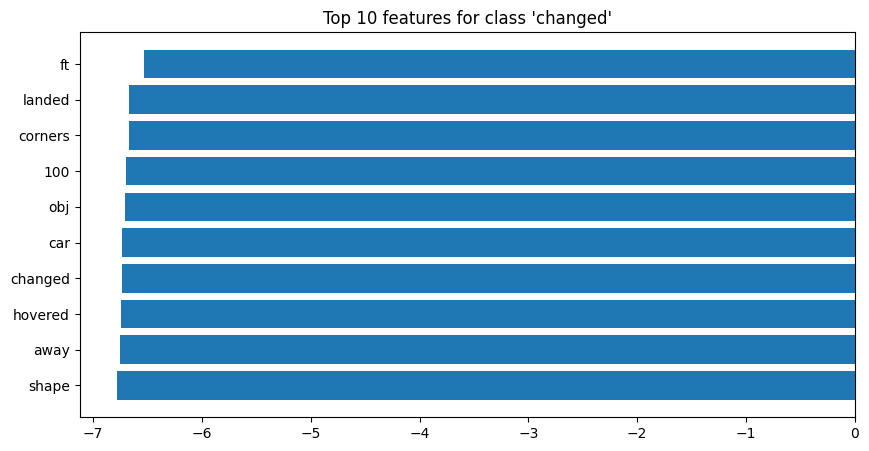

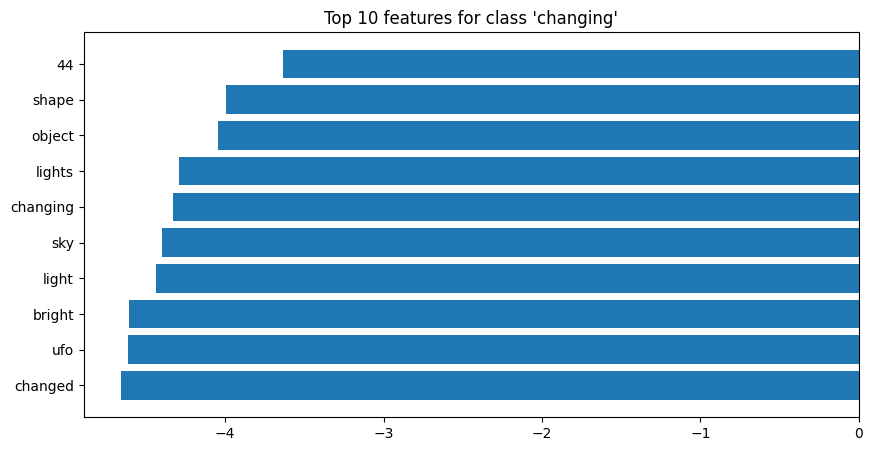

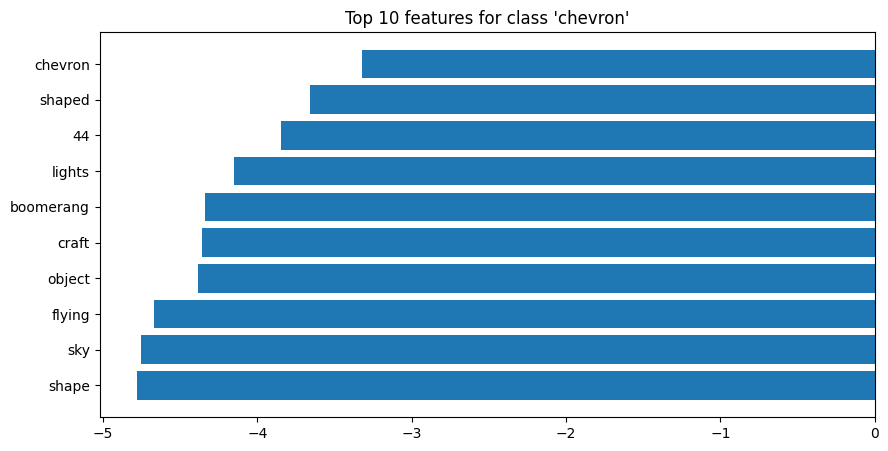

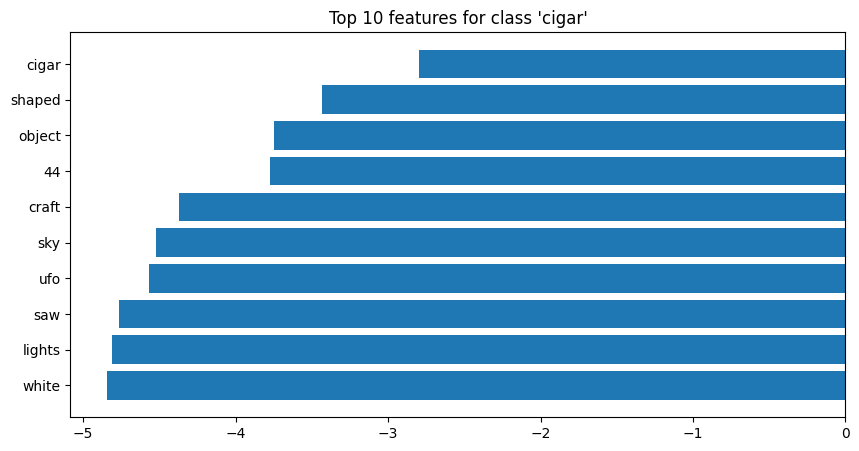

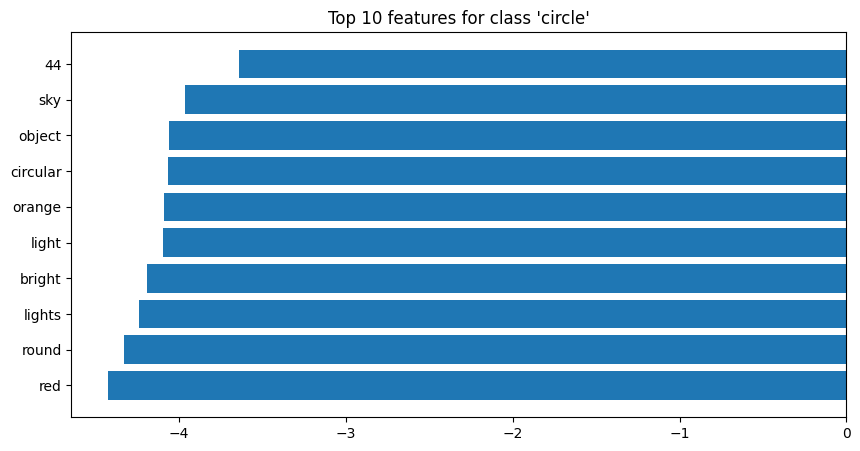

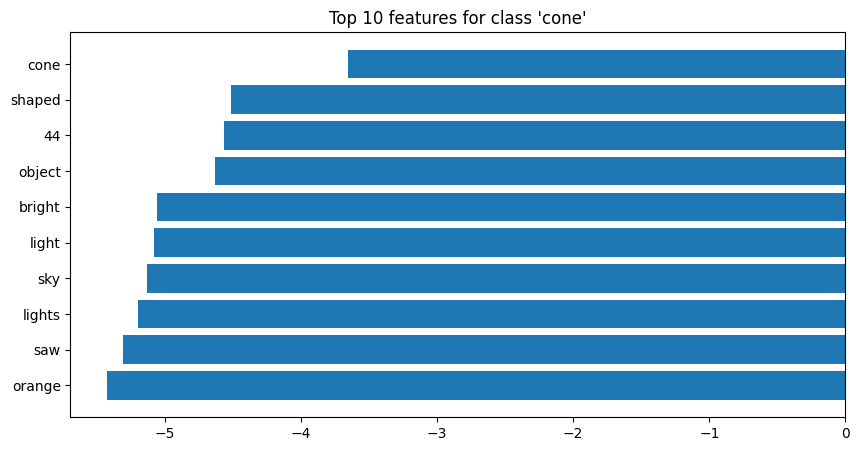

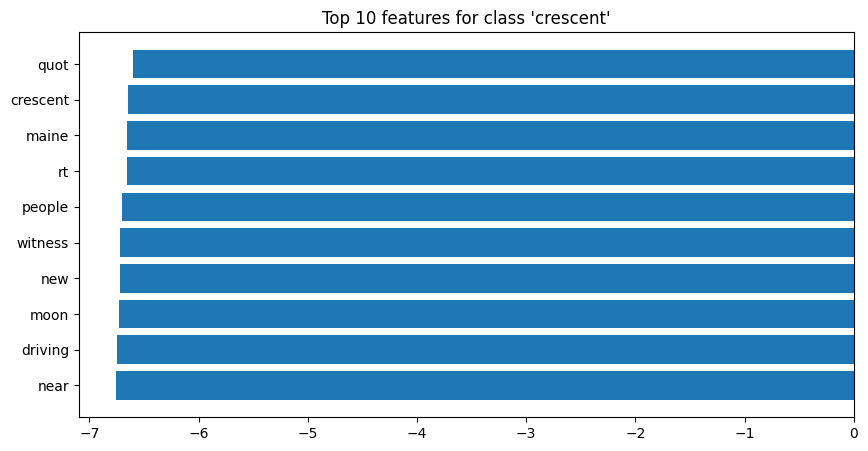

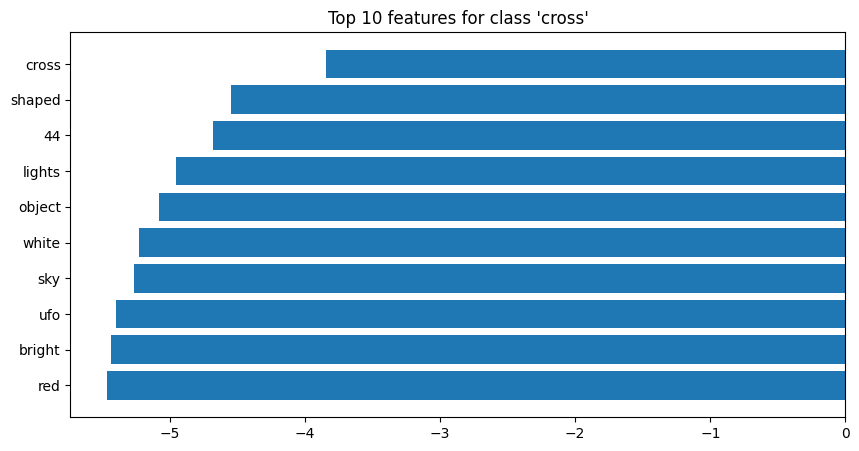

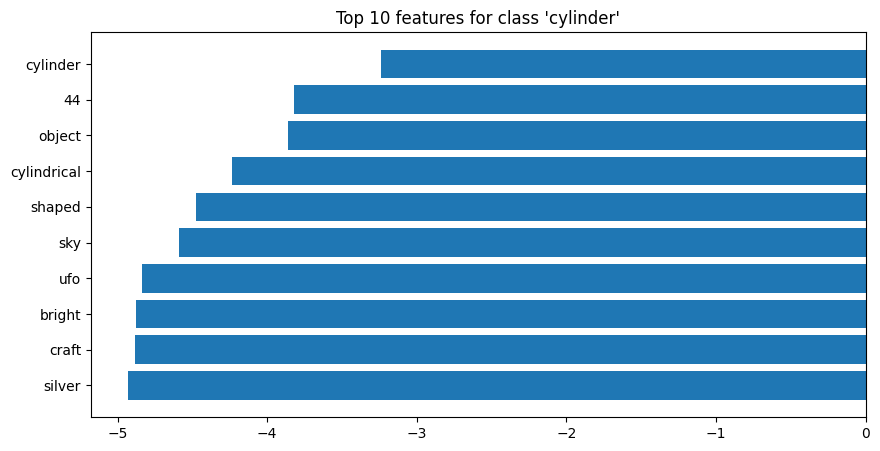

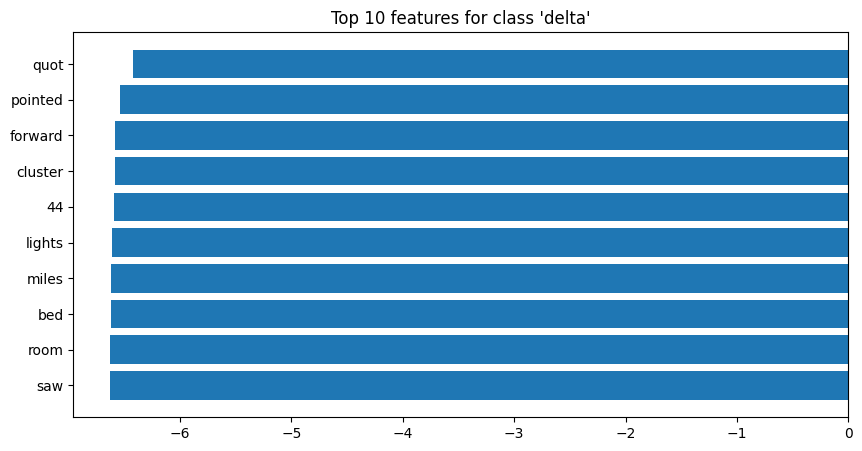

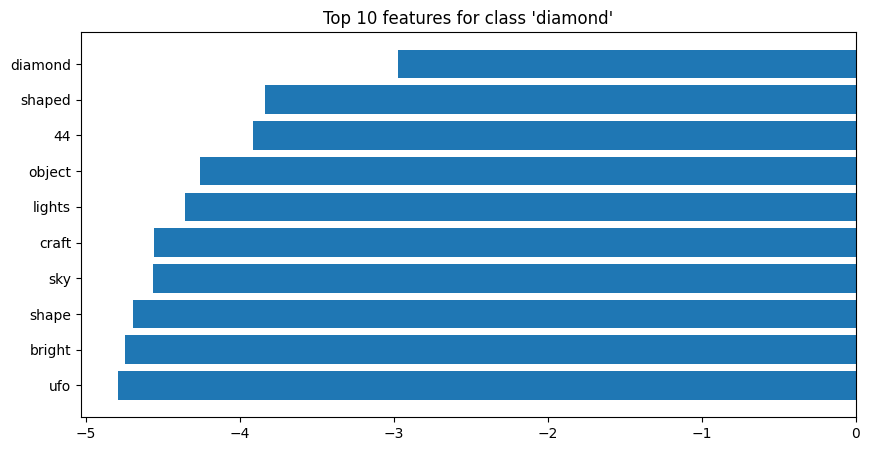

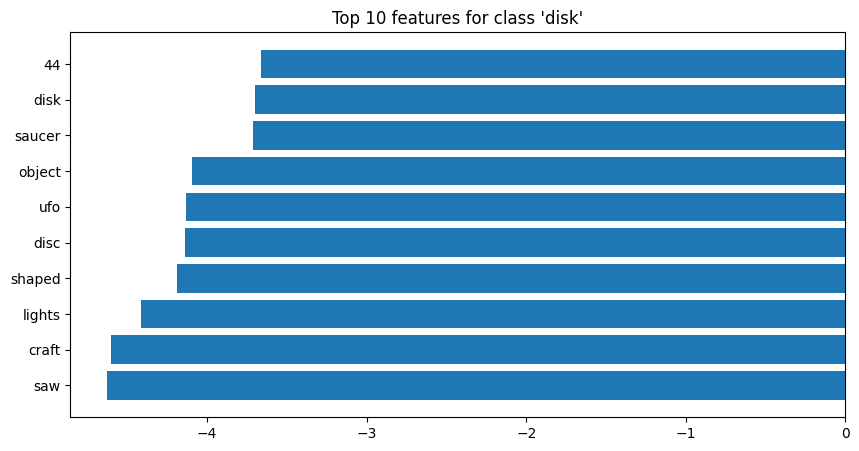

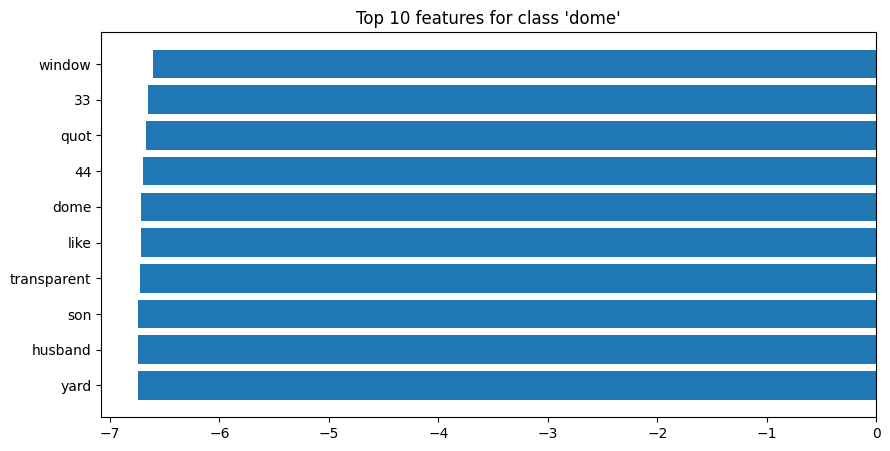

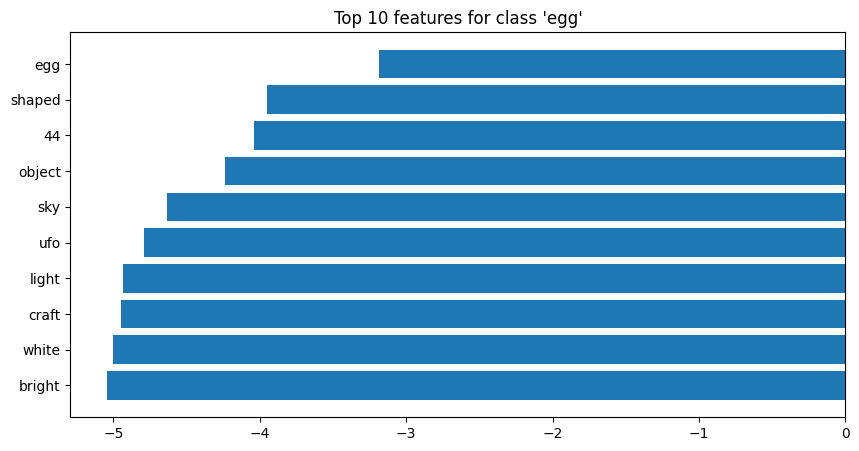

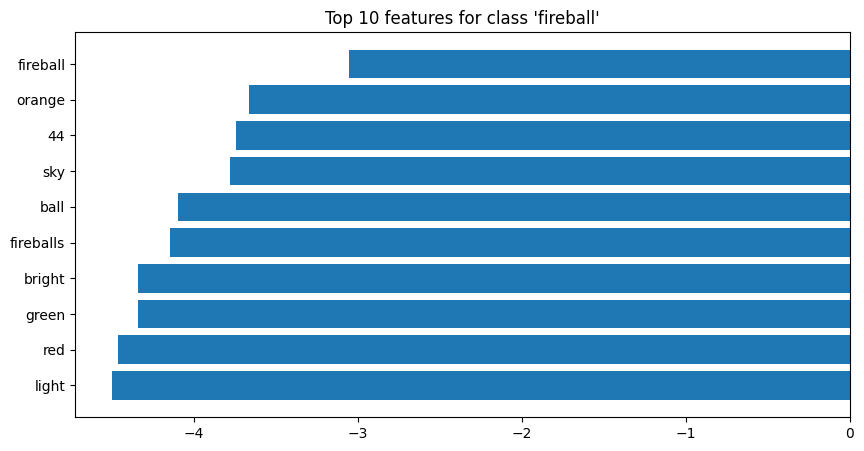

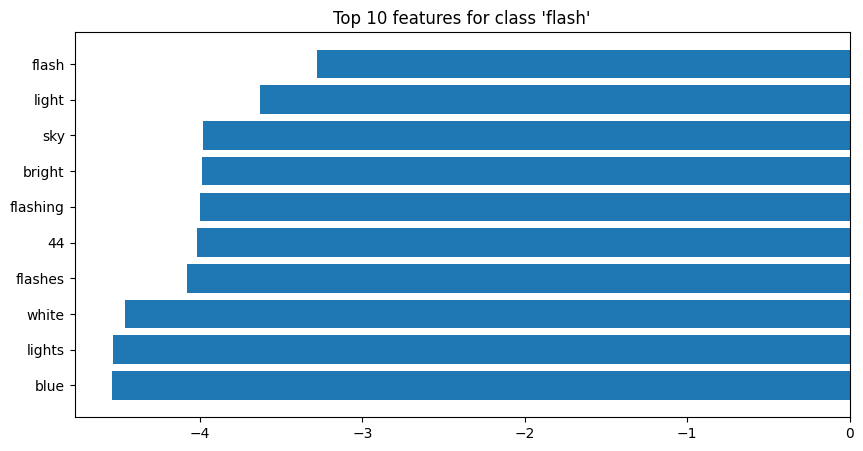

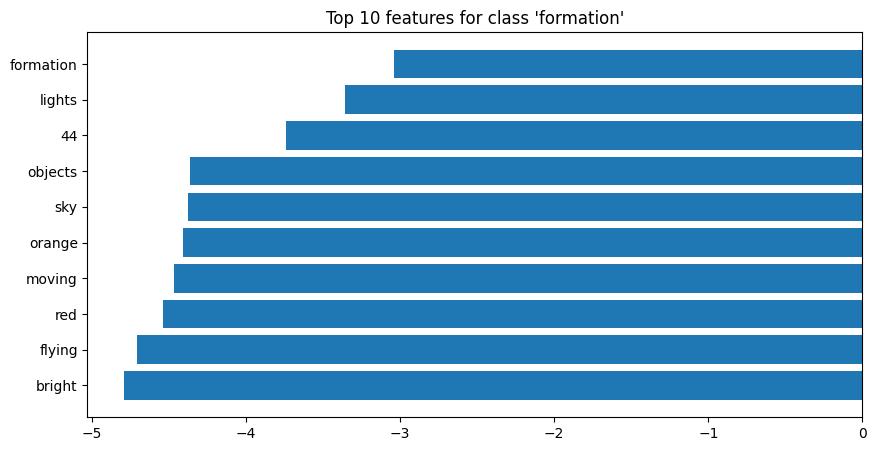

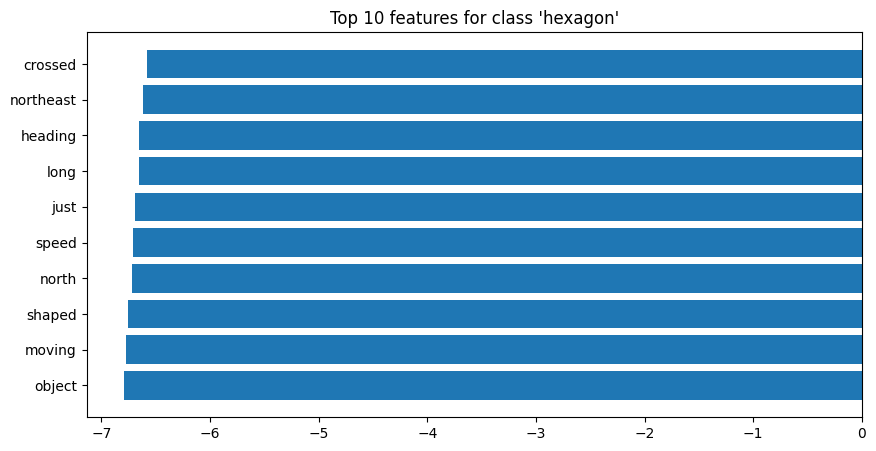

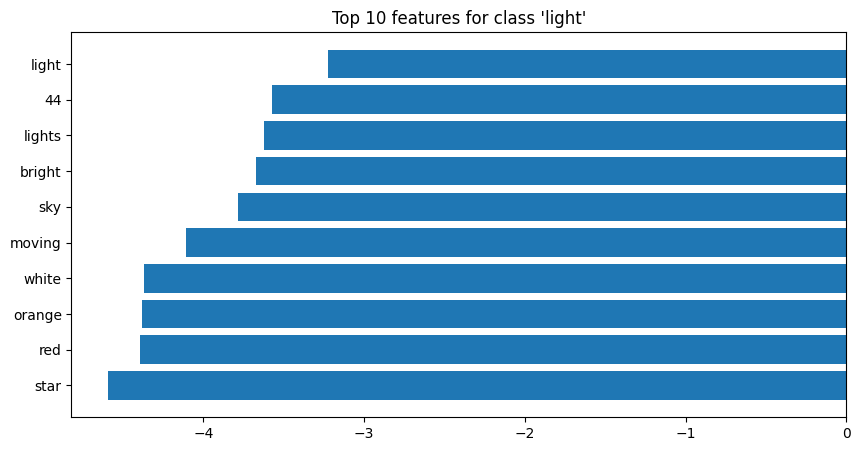

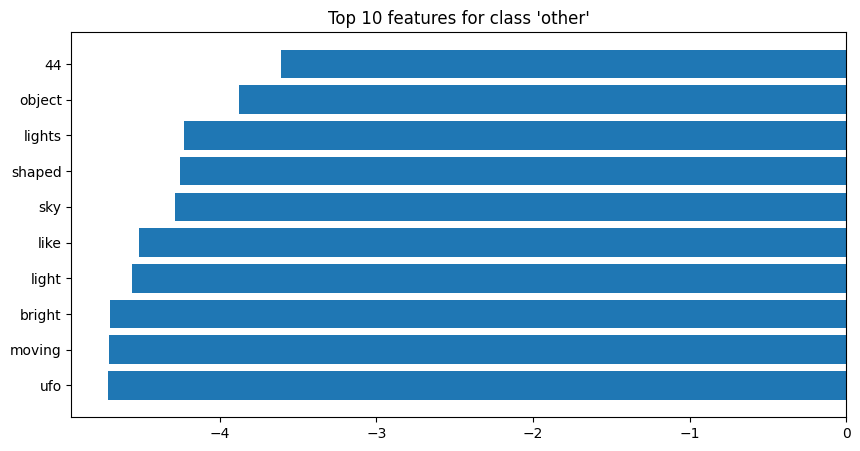

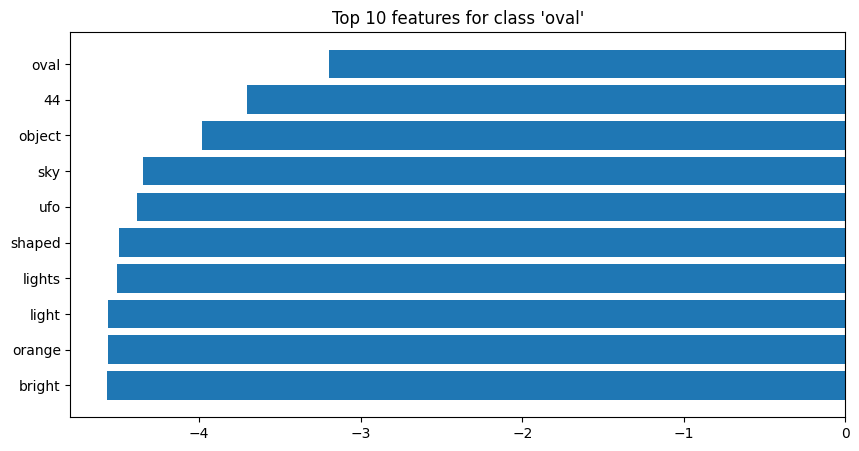

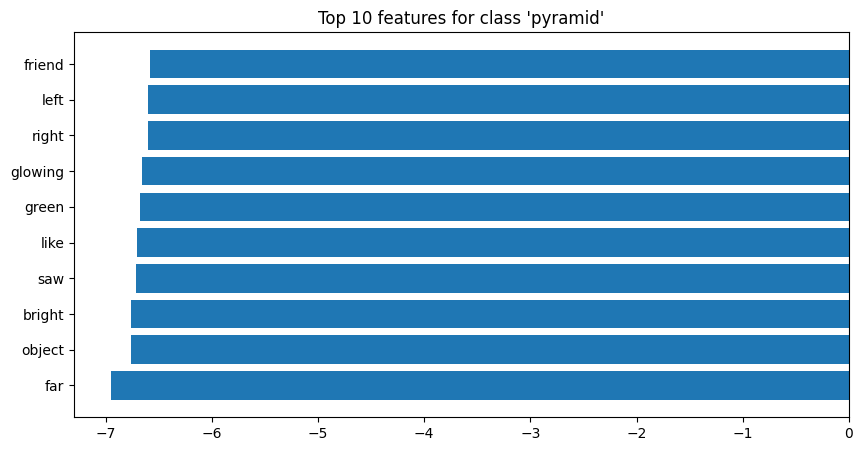

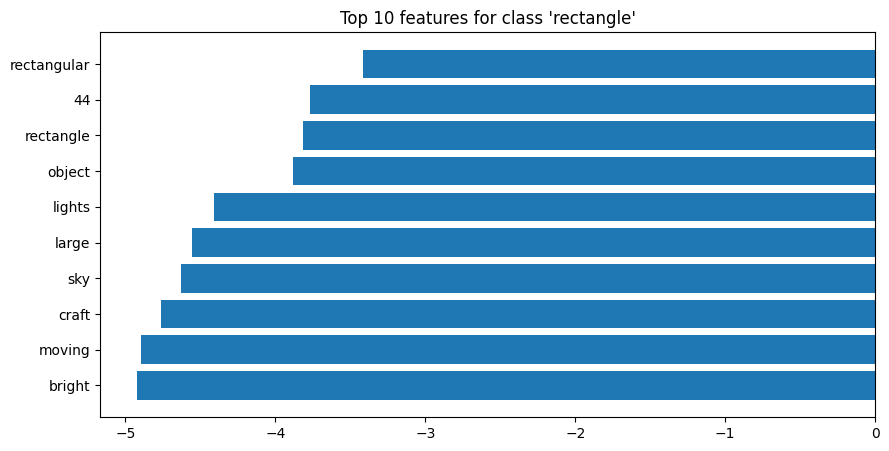

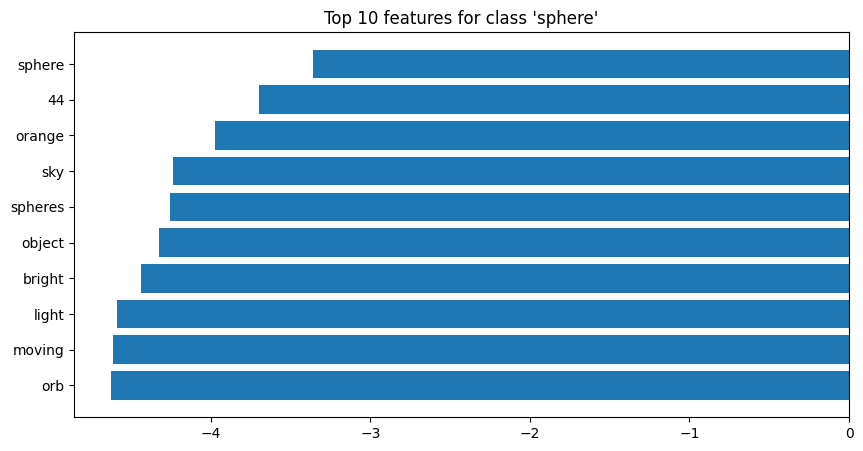

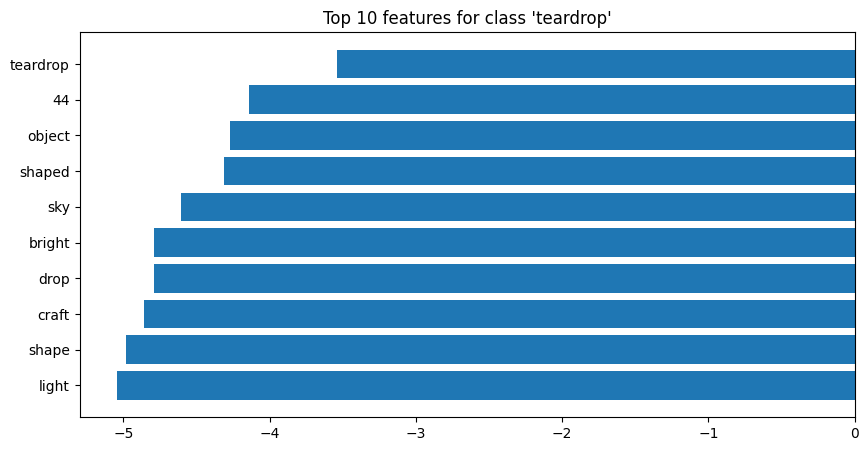

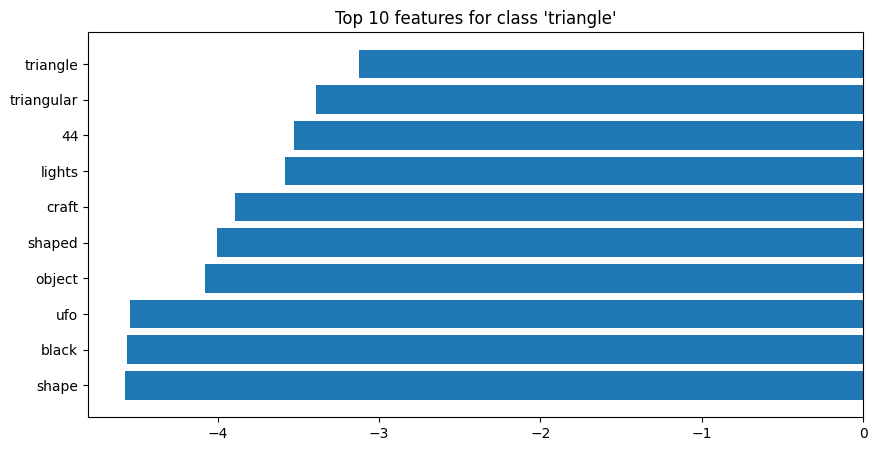

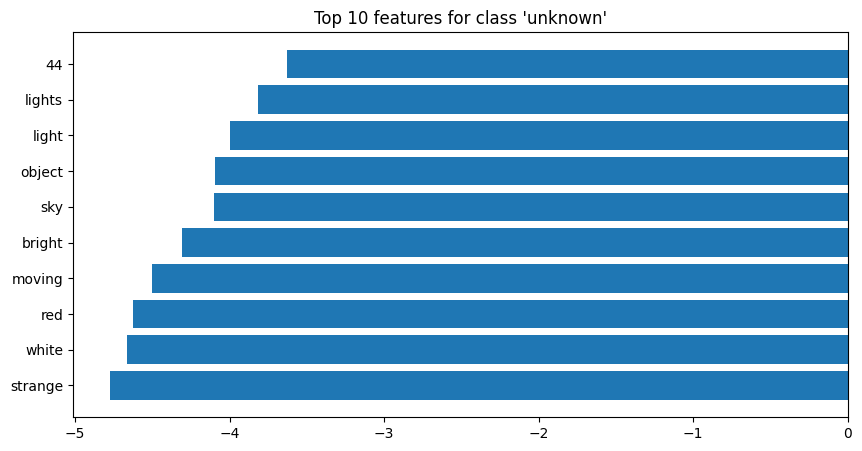

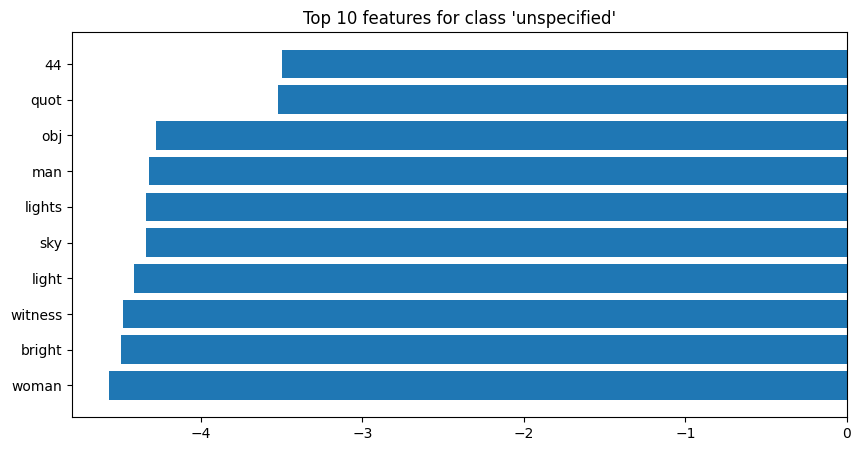

In [14]:
def plot_most_important_features(classifier, vectorizer, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, class_label in enumerate(classifier.classes_):
        top_features = np.argsort(classifier.feature_log_prob_[i])[-top_n:]
        plt.figure(figsize=(10, 5))
        plt.barh(range(top_n), classifier.feature_log_prob_[i][top_features])
        plt.yticks(range(top_n), feature_names[top_features])
        plt.title(f"Top {top_n} features for class '{class_label}'")
        plt.show()

plot_most_important_features(model, tfidf)


### **K-Means clustering**

1.  Since our overall objective it to find a central location related to UFO siting, we decided to use K-Means clustering in a more untraditional sense too see if we could find a common central location for the various UFO sightings.

2.   The image below shows a scatter plot titled "UFO Sighting Clusters", which appears to represent clusters of UFO sightings on a map, with the x-axis and y-axis likely corresponding to normalized longitude and latitude coordinates, respectively. The different colors represent various clusters of sightings, and the red 'X' marks appear to indicate the centroids of these clusters — the average location of sightings within each cluster.

3.   We also performed the same type of clustering method again, but for the second iteration, we filtered down to those that have been within the last 10 years. Since the dataset spans over a century, narrowing the sighting down to a more recent span of time will help us to understand which areas are more relevant in modern times for UFO sightings.






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

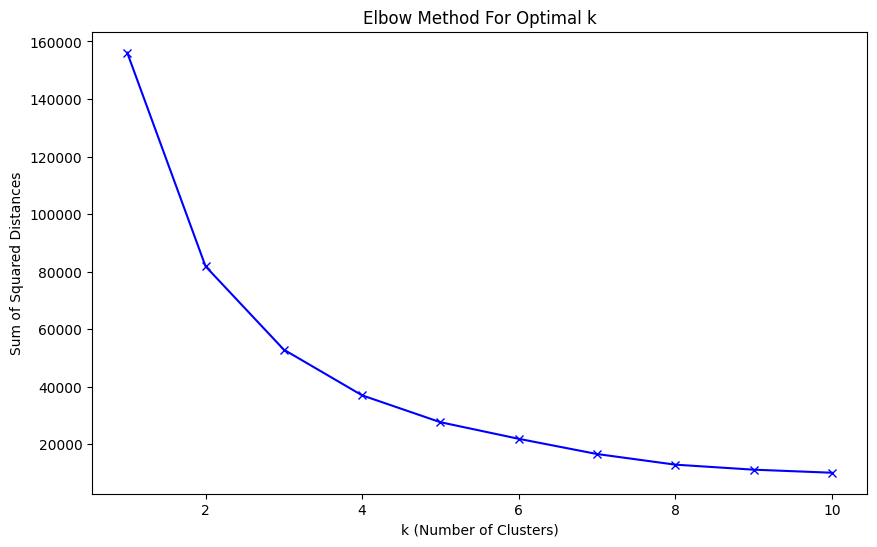

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scaling your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ufo_data[['latitude', 'longitude']])

# Calculating the sum of squared distances
sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the elbow chart
plt.figure(figsize=(10,6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


* The figure above is the Elbow chart which gives the optimal number of clusters to be chosen for the clustering algorithm.
* It can be seen that the optimal number of clusters should be 4 or 5 which would balance the model's complexity and its ability to fit the data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
    latitude   longitude
0  42.765395  -91.263201
1 -23.278150  101.600729
2  33.187903 -100.867287
3  48.293925   12.320721
Count of Data Points in Each Cluster:
0    41447
2    31408
3     3932
1     1261
dtype: int64


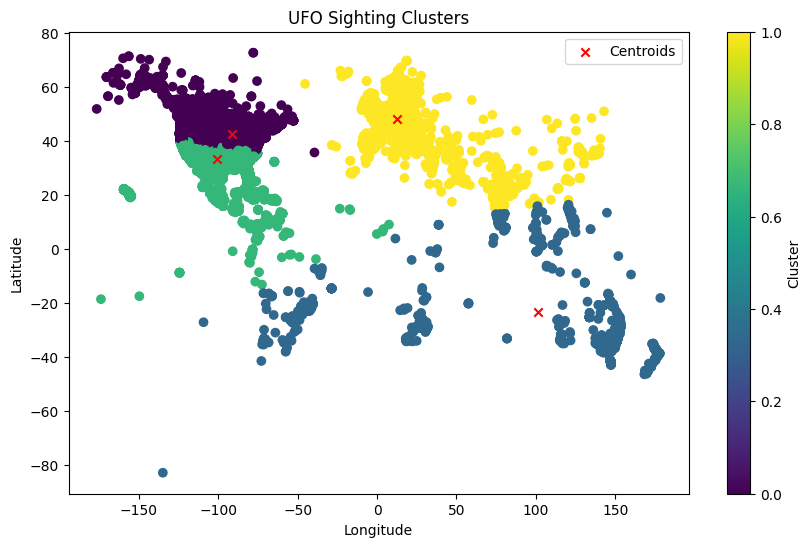

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ufo_data[['latitude', 'longitude']])

# Run K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
ufo_data['cluster'] = kmeans.fit_predict(X_scaled)

# Retrieve the cluster centers and transform them back to the original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Add the cluster centers
centers_df = pd.DataFrame(cluster_centers, columns=['latitude', 'longitude'])
print("Cluster Centers:")
print(centers_df)

# Get cluster labels for each data point
labels = kmeans.labels_

# Count number of points in each cluster
label_counts = pd.Series(labels).value_counts()
print("Count of Data Points in Each Cluster:")
print(label_counts)


# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(ufo_data['longitude'], ufo_data['latitude'], c=ufo_data['cluster'], cmap='viridis', marker='o')
plt.scatter(centers_df['longitude'], centers_df['latitude'], c='red', marker='x', label='Centroids')
plt.title('UFO Sighting Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

* The figure above describes K-Means Clustering for UFO sightings.
* The data points are plotted according to their geographical coordinates, with latitude on the y-axis and longitude on the x-axis.
*The different colors of the points represent the cluster each point belongs to as determined by the K-Means algorithm. The red 'x' marks represent the centroids of each cluster, which are the average positions of all the points in a cluster and are used by the K-Means algorithm to define the center of a cluster.

#### **Sighting Locations for the last 10 years**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-efcc7440d4c4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_recent_data['cluster'] = kmeans_recent.fit_predict(ufo_recent_scaled)


Recent Cluster Centers based on the last ten years:
    latitude   longitude
0  41.512621  -76.932488
1  -8.247776   93.270737
2  31.919954  -96.382355
3  43.914251 -118.856238
Count of Data Points in Each Cluster for the last ten years:
0    4116
2    3250
3    1784
1     150
dtype: int64


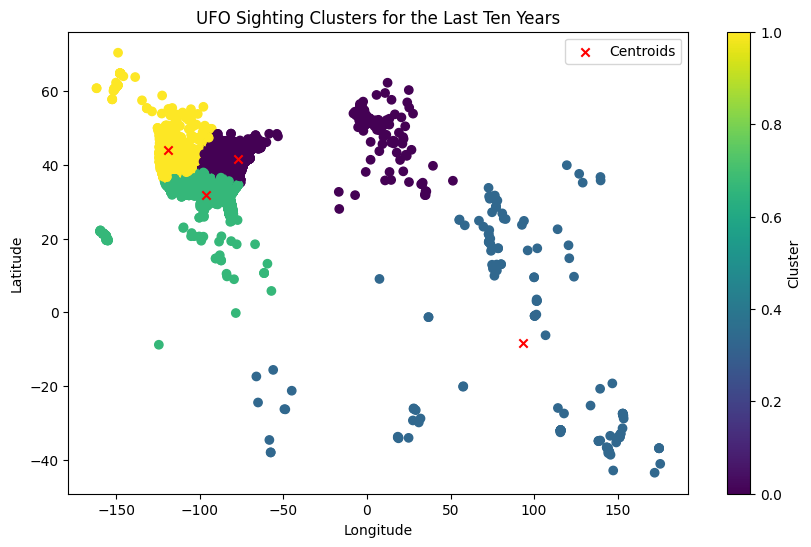

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Filter for the last ten years
current_date = datetime.now()
start_recent_decade = datetime(current_date.year - 10, 1, 1)
ufo_recent_data = ufo_data[ufo_data['datetime'] >= start_recent_decade]

# Scale the recent data using the previously fitted scaler
scaler = StandardScaler()
ufo_recent_scaled = scaler.fit_transform(ufo_recent_data[['latitude', 'longitude']])

# Fit KMeans to the scaled recent data
kmeans_recent = KMeans(n_clusters=4, random_state=42)
ufo_recent_data['cluster'] = kmeans_recent.fit_predict(ufo_recent_scaled)

# Retrieve the cluster centers and transform them back to the original scale
recent_cluster_centers = scaler.inverse_transform(kmeans_recent.cluster_centers_)

# Add the cluster centers
recent_centers_df = pd.DataFrame(recent_cluster_centers, columns=['latitude', 'longitude'])
print("Recent Cluster Centers based on the last ten years:")
print(recent_centers_df)

# Get cluster labels for each data point
labels_recent = kmeans_recent.labels_

# Count number of points in each cluster
label_counts_recent = pd.Series(labels_recent).value_counts()
print("Count of Data Points in Each Cluster for the last ten years:")
print(label_counts_recent)

# Plot the clusters for the last ten years
plt.figure(figsize=(10, 6))
plt.scatter(ufo_recent_data['longitude'], ufo_recent_data['latitude'], c=ufo_recent_data['cluster'], cmap='viridis', marker='o')
plt.scatter(recent_centers_df['longitude'], recent_centers_df['latitude'], c='red', marker='x', label='Centroids')
plt.title('UFO Sighting Clusters for the Last Ten Years')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

* The figure above describes K-Means Clustering for UFO sightings of last 10 years.
* The data points are plotted according to their geographical coordinates, with latitude on the y-axis and longitude on the x-axis.
* The different colors of the points represent the cluster each point belongs to as determined by the K-Means algorithm. The red 'x' marks represent the centroids of each cluster, which are the average positions of all the points in a cluster and are used by the K-Means algorithm to define the center of a cluster.
* It was observed that most number of clusters points were located in the United States of America which means that highest number of sightings were obsreved in USA whereas AAsian and European continents had least sightings of UFOs.

In [20]:
!pip install folium

In [22]:
import folium
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert 'datetime' column to datetime objects if not already done
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'])

# Filter data for the recent decade
current_date = datetime.now()
start_recent_decade = datetime(current_date.year - 10, 1, 1)
ufo_recent_data = ufo_data[ufo_data['datetime'] >= start_recent_decade]

# Scaling
scaler = StandardScaler()
ufo_recent_scaled = scaler.fit_transform(ufo_recent_data[['latitude', 'longitude']])

# Fit KMeans to the scaled recent data
kmeans_recent = KMeans(n_clusters=4, random_state=42)
ufo_recent_data['cluster'] = kmeans_recent.fit_predict(ufo_recent_scaled)

# Retreiving cluster centres and transforming them to original scale.
recent_cluster_centers = scaler.inverse_transform(kmeans_recent.cluster_centers_)

# Create a map centered around the mean latitude and longitude of the recent data
map_center_latitude = ufo_recent_data['latitude'].mean()
map_center_longitude = ufo_recent_data['longitude'].mean()
ufo_map = folium.Map(location=[map_center_latitude, map_center_longitude], zoom_start=4)

# Define a color scheme
colors = ['red', 'blue', 'green', 'purple']

# Plot each recent sighting as a circle marker on the map
for _, row in ufo_recent_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=colors[int(row['cluster']) % len(colors)],
        fill=True,
        fill_color=colors[int(row['cluster']) % len(colors)]
    ).add_to(ufo_map)

# Add markers for the recent cluster centers
for idx, center in enumerate(recent_cluster_centers):
    folium.Marker(
        location=[center[0], center[1]],
        popup=f'Cluster {idx}',
        icon=folium.Icon(color=colors[idx % len(colors)], icon='star')
    ).add_to(ufo_map)

# Save the map to an HTML file
ufo_map


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-22-0d2d40003115>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo_recent_data['cluster'] = kmeans_recent.fit_predict(ufo_recent_scaled)


* Determining the most common shape in each cluster.

In [23]:
# Determine the most common shape in each cluster
most_common_shape_per_cluster = ufo_data.groupby('cluster')['shape'].agg(lambda x: x.value_counts().index[0])


for cluster, shape in most_common_shape_per_cluster.iteritems():
    print(f"Cluster {cluster}: Most common shape = {shape}")


Cluster 0: Most common shape = light
Cluster 1: Most common shape = light
Cluster 2: Most common shape = light
Cluster 3: Most common shape = light


<ipython-input-23-36e44e57a6df>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster, shape in most_common_shape_per_cluster.iteritems():


* **Determining the 2nd most common shape in each cluster.**

In [24]:
# Determine the most common shape in each cluster
most_common_shape_per_cluster = ufo_data.groupby('cluster')['shape'].agg(lambda x: x.value_counts().index[1])


for cluster, shape in most_common_shape_per_cluster.iteritems():
    print(f"Cluster {cluster}: Most common shape = {shape}")

Cluster 0: Most common shape = triangle
Cluster 1: Most common shape = circle
Cluster 2: Most common shape = triangle
Cluster 3: Most common shape = circle


<ipython-input-24-a84ca5790fff>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster, shape in most_common_shape_per_cluster.iteritems():


* **Determining the 3rd most common shape in each cluster.**

In [25]:
# Determine the most common shape in each cluster
most_common_shape_per_cluster = ufo_data.groupby('cluster')['shape'].agg(lambda x: x.value_counts().index[2])


for cluster, shape in most_common_shape_per_cluster.iteritems():
    print(f"Cluster {cluster}: Most common shape = {shape}")

Cluster 0: Most common shape = circle
Cluster 1: Most common shape = disk
Cluster 2: Most common shape = circle
Cluster 3: Most common shape = triangle


<ipython-input-25-3794d51a89ac>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cluster, shape in most_common_shape_per_cluster.iteritems():


As per the observations above

* **Cluster 0:**
The most common UFO shape is 'light'.
The second most common shape is 'triangle'.
The third most common shape is 'circle'.

* **Cluster 1:**
The most common UFO shape is 'light'.
The second most common shape is 'circle'.
The third most common shape is 'disk'.

* **Cluster 2:**
The most common UFO shape is 'light'.
The second most common shape is 'triangle'.
The third most common shape is 'circle'.

* **Cluster 3:**
The most common UFO shape is 'light'.
The second most common shape is 'circle'.
The third most common shape is 'triangle'.

* These results suggest that across all clusters, the 'light' shape is the most frequently reported shape for UFO sightings. 'Triangle' and 'circle' shapes also appear to be common, interchanging as the second and third most common shapes in the clusters. Each cluster seems to have its own distinct second and third preferences for UFO shapes, with some variations like 'disk' also appearing as a third common shape in Cluster 1.


In [27]:
# Getting the centroids of each cluster
centroids = kmeans.cluster_centers_

In [30]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for sightings in the United States
us_ufo_data = ufo_data[ufo_data['country'] == 'us']

# Create a contingency table of UFO shapes by state
contingency_table = pd.crosstab(us_ufo_data['shape'], us_ufo_data['state'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the chi-square test results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared Statistic: 2401.8077318748833
P-value: 1.2787576126874212e-52


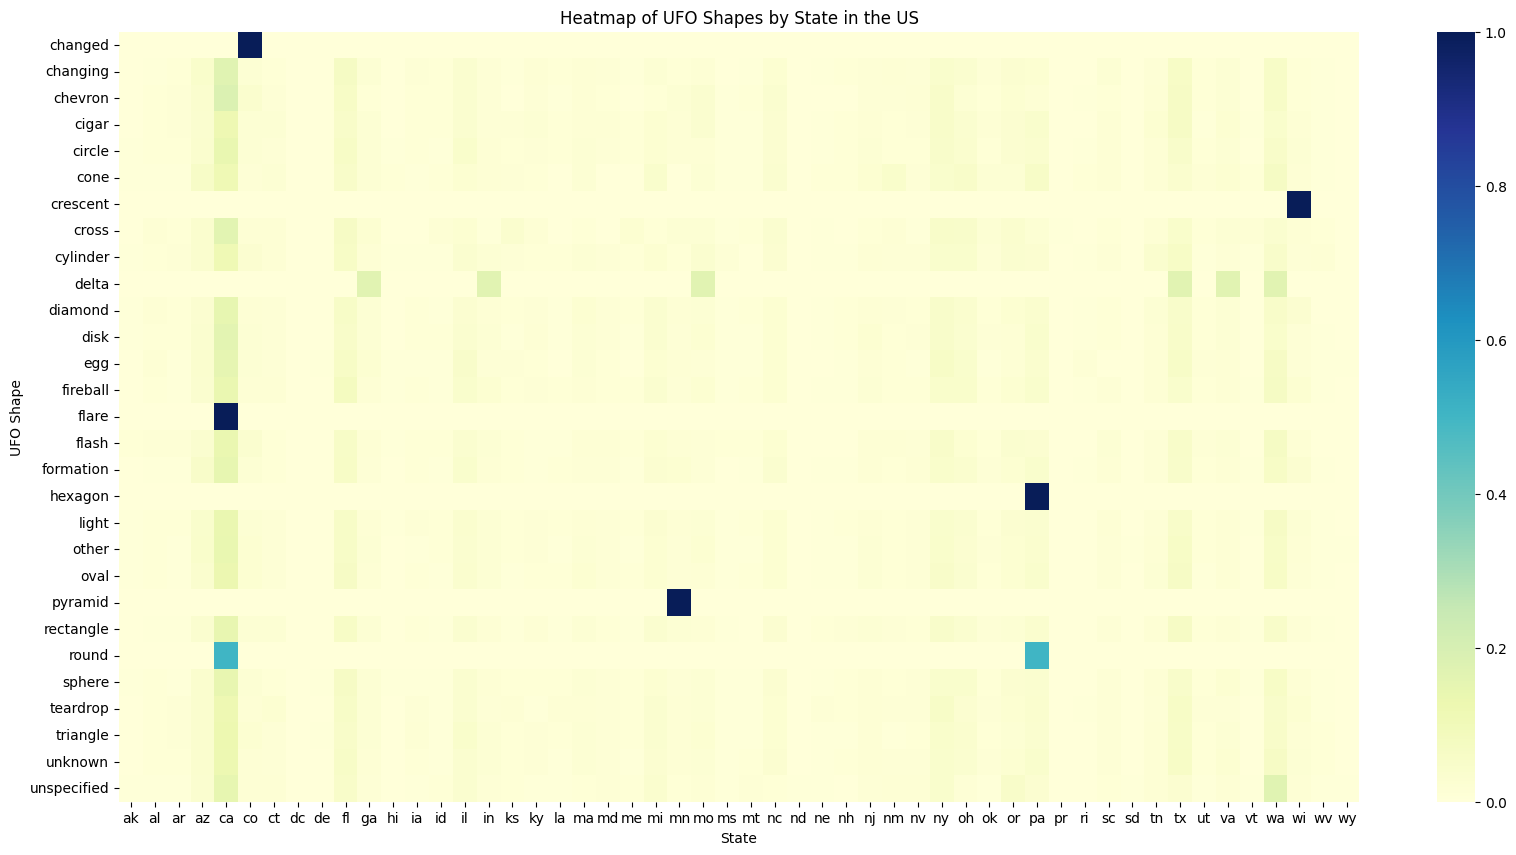

In [29]:
# Normalizing the data for better visualization
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Creating the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(normalized_table, annot=False, cmap="YlGnBu")
plt.title('Heatmap of UFO Shapes by State in the US')
plt.xlabel('State')
plt.ylabel('UFO Shape')
plt.show()


* The heatmap above visualizes data across two dimensions: UFO shapes categorized on the y-axis and US states represented by their postal codes on the x-axis. The color gradient, which ranges from light to dark as indicated by the scale on the right, signifies the relative frequency of each UFO shape reported in each state.The darker the color, the higher the frequency of reports for that shape in that state. Conversely, lighter colors suggest fewer reports.
* Some UFO shapes appear to have a higher reported frequency in certain states, as indicated by the darker colors.
* The shape 'Flare' has higher frequency for state of California(ca).
* The UFO shape round has the second highest frequency of appearance after the UFO shape Flare for California.
* Similarly the shape 'pyramid' has a higher frequency of being reported in state Minnesota(mn).
* The UFO shape 'hexagon' had a higher reported frequency in Pennsylvania(pa).
* Similarly the UFO shape 'cresecent' had higher appearance in Wisconsin.


<ipython-input-31-5e9cf84070bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_ufo_data['time_of_day'] = us_ufo_data['datetime'].dt.hour.apply(lambda x: 'day' if 6 <= x <= 18 else 'night')


Chi-squared Statistic: 2637.097586092434
P-value: 0.0


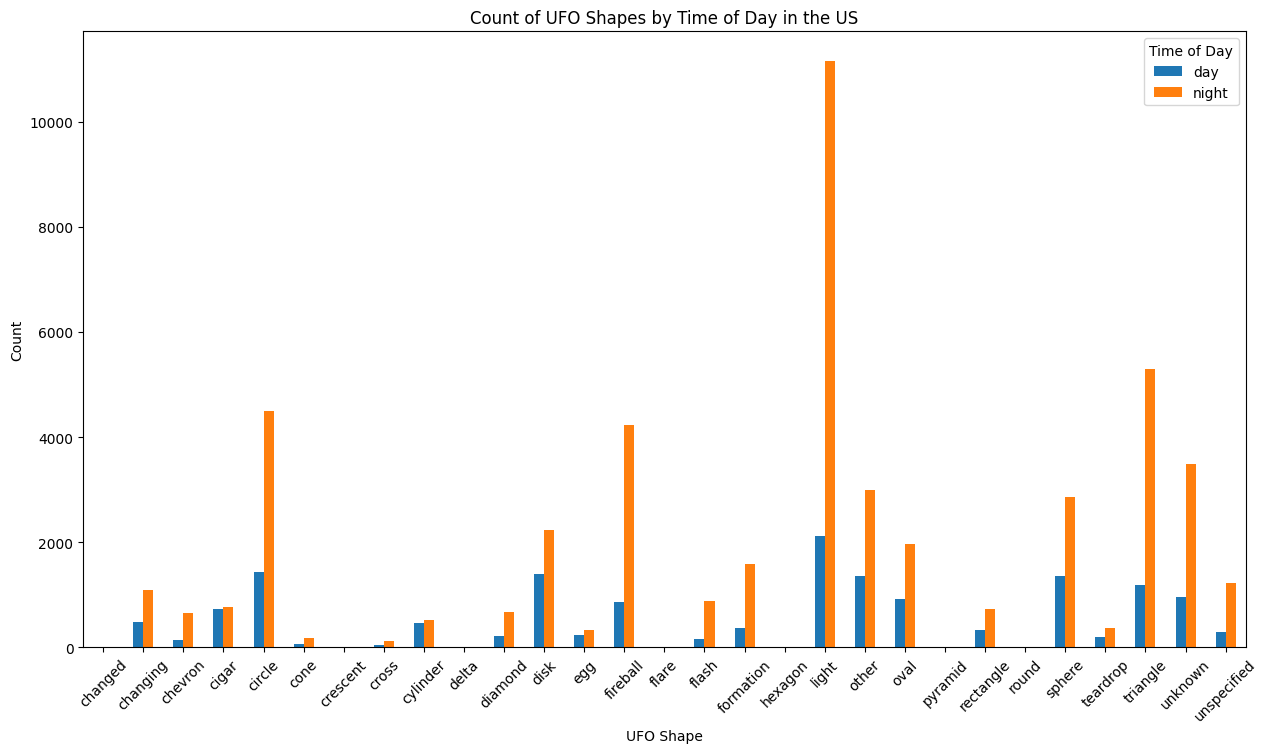

In [31]:
from scipy.stats import chi2_contingency

# Filter the dataset for sightings in the United States
us_ufo_data = ufo_data[ufo_data['country'] == 'us']

# Categorizing into 'day' and 'night'
# Assuming 'datetime' is in a suitable format (e.g., pandas datetime)
us_ufo_data['time_of_day'] = us_ufo_data['datetime'].dt.hour.apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

# Creating a contingency table
contingency_table_time = pd.crosstab(us_ufo_data['shape'], us_ufo_data['time_of_day'])

# Performing the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_time)

# Displaying the results
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")

# Summarize the data: Count of UFO shapes for each time of day
summary_table = pd.crosstab(us_ufo_data['shape'], us_ufo_data['time_of_day'])

# Plotting
summary_table.plot(kind='bar', figsize=(15, 8))

# Adding labels and title
plt.xlabel('UFO Shape')
plt.ylabel('Count')
plt.title('Count of UFO Shapes by Time of Day in the US')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.legend(title='Time of Day')

# Show the plot
plt.show()


* Each pair of bars represents a different shape of UFO as labeled on the x-axis.
The orange bars represent sightings during the day.
The blue bars represent sightings at night.
The chart shows the distribution of UFO sighting shapes and how often they were reported during the day versus at night. Some shapes seem to have a higher frequency of being reported during the night than during the day, which is typical considering that many UFO sightings occur in the evening or at night when the sky is dark and lights are more visible.

* From p-value of 0 we would conclude that there is a statistically significant difference in the distribution of UFO shapes reported between day and night.

*  The chart implies that certain UFO shapes are more likely to be reported at specific times of the day, which could be influenced by factors like visibility and the presence of observers. Shapes like 'light' and 'circle' appear to have a particularly high frequency at night, which might be due to the fact that lights are more noticeable in the dark, and circular shapes might be a common description for unidentified lights seen in the sky.

##**Final Summary**


**Sightings by Country:**
Our analysis revealed that the United States had the highest number of UFO sightings, with "unknown" as the second-highest category due to missing country values.

**UFO Sightings by Year:**
We filtered the data to focus on sightings up to the current date, revealing a significant increase in sightings around 1995 and a sharp decline after 2014.

**UFO Sightings by Shape:**
The most common reported shape was "light," followed by "triangle."

**Machine Learning Model:**
To understand the relationship between comments and reported UFO shapes, we utilized machine learning. We employed the TfidfVectorizer and implemented smoothing to handle zero frequencies. Two models were evaluated, with the second model showing slight improvements.

**K-Means Clustering:**
K-Means clustering was applied to identify clusters of UFO sightings. An elbow chart suggested an optimal number of clusters between 4 and 5. We visualized these clusters, both for all sightings and those within the last decade, finding commonalities in sighting locations.

**Additional Insights:**
We analyzed the distribution of UFO shapes by US state using a heatmap, indicating specific shapes reported more frequently in certain states. Additionally, we examined the distribution of UFO shapes during the day versus at night, revealing statistically significant differences.

* After a thorough dive into the history of UFO sighting, and with the help of Machine Learning, we were eventually able to pinpoint statistically common locations for UFO sightings.

* As part of our analysis, we researched and learned clever and innovative ways to build various model. This can been seen in the effort we made to parse and compare the comments made to the eventual shape that was documented.

* While the technique of using clustering algorithms may be a non traditional approach, it proved to be very affective in finding the central hotspots geographically. We were able to pinpoint central cordinated for each cluster, along for the count of sightings for each of those clusters. This was even more refined when we reduced the span of time to the last ten years of data.

* In summartion, we had fun! Our stakeholder in this project is everyone who enjoys looking into the mysteries of UFO sightings. More research will follow, but we beleive this initial approach was insighful and also hopefully enjoyable for everyone else.